In [10]:
# Step 1: Import Necessary Libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# from torchvision import datasets, transforms


In [31]:
# Step 2: Define the CNN Architecture

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Assuming 10 classes for classification

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x


In [32]:
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Step 3: Set Up Data Loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Replace 'CIFAR10' with the actual dataset class you want to use
train_dataset = datasets.CIFAR10(root='./00 Data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./00 Data', train=False, download=True, transform=transform)

# Adjust batch_size and shuffle according to your preferences
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [33]:
# Step 4: Initialize Model, Loss Function, and Optimizer
# model = SimpleCNN()
model = SimpleCNN(input_channels=3)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


TypeError: SimpleCNN.__init__() got an unexpected keyword argument 'input_channels'

In [34]:
# Step 5: Training Loop
epochs = 5

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')


RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[64, 3, 32, 32] to have 1 channels, but got 3 channels instead

In [ ]:
# Step 6: Evaluation

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


## Another one


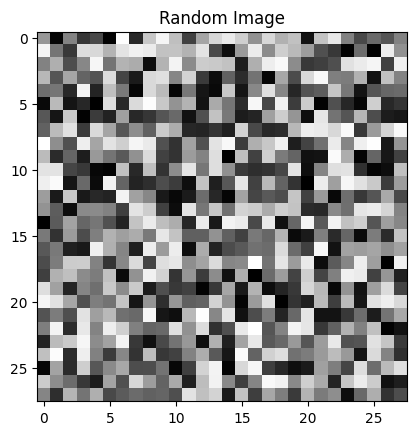

Epoch 1/5, Loss: 2.372121810913086
Epoch 2/5, Loss: 0.7439691424369812
Epoch 3/5, Loss: 0.14282938838005066
Epoch 4/5, Loss: 0.02406354807317257
Epoch 5/5, Loss: 0.004598637111485004
Predicted Class: 0


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random image
random_image = np.random.rand(28, 28)  # Assuming MNIST-like dimensions (28x28)
plt.imshow(random_image, cmap='gray')
plt.title('Random Image')
plt.show()

# Step 2: Convert the random image to PyTorch tensor
random_image_tensor = torch.Tensor(random_image).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
random_image_tensor /= random_image_tensor.max()  # Normalize to [0, 1]

# Step 3: Set up a simple CNN model (as defined in the previous example)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Assuming 10 classes for classification

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc2(x)
        return x

# Step 4: Initialize Model, Loss Function, and Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the model using the random image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = TensorDataset(random_image_tensor, torch.tensor([0]))  # Label doesn't matter for a random image
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

epochs = 5

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Step 6: Evaluate the model on the random image
model.eval()
with torch.no_grad():
    output = model(random_image_tensor)
    _, predicted_class = torch.max(output, 1)

print(f'Predicted Class: {predicted_class.item()}')


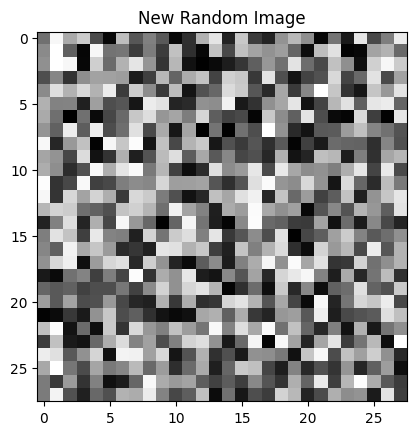

Predicted Class for New Random Image: 0


In [9]:
# Step 7: Test the trained model on a new random image
new_random_image = np.random.rand(28, 28)  # Generate a new random image
plt.imshow(new_random_image, cmap='gray')
plt.title('New Random Image')
plt.show()

# Convert the new random image to PyTorch tensor
new_random_image_tensor = torch.Tensor(new_random_image).unsqueeze(0).unsqueeze(0)
new_random_image_tensor /= new_random_image_tensor.max()

# Evaluate the trained model on the new random image
model.eval()
with torch.no_grad():
    new_output = model(new_random_image_tensor)
    _, new_predicted_class = torch.max(new_output, 1)

print(f'Predicted Class for New Random Image: {new_predicted_class.item()}')
